> **DO YOU USE GITHUB?**  
If True: print('Remember to make your edits in a personal copy of this notebook')  
Else: print('You don't have to understand. Continue your life.')

# Module 7: Web Scraping 2

In module_6 your learned some powerful tricks. Tricks that will work when the data is already shipped in a neat format. However this is often not the case. In this session we shall learn the art of parsing unstructured text and a more principled and advanced method of parsing HTML.

This will help you build ***custom datasets*** within just a few hours or days work, that would have taken ***months*** to curate and clean manually.



Readings for `module 6+7+8`:
- [Python for Data Analysis, chapter 6](https://bedford-computing.co.uk/learning/wp-content/uploads/2015/10/Python-for-Data-Analysis.pdf)
- [A Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/)
- [An introduction to web scraping with Python](https://towardsdatascience.com/an-introduction-to-web-scraping-with-python-a2601e8619e5)
- [Introduction to Web Scraping using Selenium](https://medium.com/the-andela-way/introduction-to-web-scraping-using-selenium-7ec377a8cf72)

Video materiale from `ISDS 2020`:
- [Web Scraping 1](https://bit.ly/ISDS2021_6)
- [Web Scraping 2](https://bit.ly/ISDS2021_7)
- [Web Scraping 3](https://bit.ly/ISDS2021_8)

Other ressources:
- [Nicklas Webpage](https://nicklasjohansen.netlify.app/)
- [Data Driven Organizational Analysis, Fall 2021](https://efteruddannelse.kurser.ku.dk/course/2021-2022/ASTK18379U)
- [Master of Science (MSc) in Social Data Science](https://www.socialdatascience.dk/education)


## Introduction to HTML
[What is HTML?](https://www.w3schools.com/whatis/whatis_html.asp)  

HTML has a Tree structure. 

Each node in the tree has:
- Children, siblings, parents, descendants. 
- Ids and attributes

<img src="http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png"/>


## Important syntax and patterns
_______________
```html 
<p>The p tag indicates a paragraph <p/>
```
_______________
```html 
<b>The b tag makes the text bold, giving us a clue to its importance </b>
```
output: <b>The b tag makes the text bold, giving us a clue to its importance </b>
```html 

<em>The em tag emphasize the text</em>, giving us a clue to its importance
```
output: <em>The em tag makes emphasize the text</em>, giving us a clue to its importance
___________
```html 
<h1>h1</h1><h2>h2</h2><h3>h3</h3><b>Headers give similar clues</b>
```
output:
<h1>h1</h1><h2>h2</h2><h3>h3</h3><b>Headers give similar clues</b>  
  
```html 
<a href="www.google.com">The a tag creates a hyperlink <a/>
```
output: <a href="www.google.com">The a tag creates a hyperlink <a/>

## How do we find our way around this tree?
1. Regex: Extracting string patterns using .split and regular expresssions
2. CSS-selectors: Specifying paths using css-selectors, xpath syntax.
3. ```BeautifulSoup```: A more powerful, principled and readable way to parse data and navigate HTML

In [3]:
import requests
from bs4 import BeautifulSoup
import re
import selenium
import time
import pandas as pd

### Regex
- [What is regex?](https://en.wikipedia.org/wiki/Regular_expression)
- The brute force way is to parse by convering your downloded matriale into a large string
- Now you can create standard string operations
- And apply smart regex to identify the data you are looking for e.g. links.

In [23]:
url = 'https://www.theguardian.com/us-news/2019/aug/14/taco-eating-contest-death-fresno-california'
response = requests.get(url)
html = response.text
#html.split('\n')
#re.findall("(?P<url>https?://[^\s]+)", html)[0]

### CSS Selectors 
- [What is a CSS Selector?](https://www.w3schools.com/css/css_selectors.asp)
- Another way to browse through the HTML tree
- Define a unique path to an element in the HTML tree.
- It is quick but has to be hardcoded and also more likely to break.
- [Nicklas recommend using this free Google Chrome CSS Selector](https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb)

In [15]:
url = 'https://www.theguardian.com/us-news/2019/aug/14/taco-eating-contest-death-fresno-california'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
soup.select('.dcr-125vfar')[0].text

'Man dies after taco-eating contest in California'

## Parsing HTML with BeautifulSoup
BeautifulSoup makes the html tree navigable. 
It allows you to:
    * Search for elements by tag name and/or by attribute.
    * Iterate through them, go up, sideways or down the tree.
    * Furthermore it helps you with standard tasks such as extracting raw text from html,
    which would be a very tedious task if you had to hardcode it using `.split` commands and using your own regular expressions will be unstable.

In [42]:
url = 'https://www.theguardian.com/us-news/2019/aug/14/taco-eating-contest-death-fresno-california'
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html,'lxml') # parse the raw html using BeautifoulSoup

In [30]:
# example: finding hyperlinks
links = soup.find_all('a') # find all a tags -connoting a hyperlink.
[link['href'] for link in links if link.has_attr('href')][0:5] # unpack the hyperlink from the a nodes.

['#maincontent',
 '#navigation',
 '/preference/edition/int',
 '/preference/edition/uk',
 '/preference/edition/us']

In [33]:
# example: finding headline
headline = soup.find('h1') # search for the first headline: h1 tag. 
name = headline['class'][0].strip() # use the class attribute name as column name.
value = headline.text.strip() # extract text using build in method.
print(name,':',value)

dcr-125vfar : Man dies after taco-eating contest in California


In [60]:
# example: finding article_text
article_text = soup.findAll('div', {'class':'dcr-185kcx9'})[0]
article_text.text

'A man died shortly after competing in a taco-eating contest at a minor league baseball game in California, authorities said Wednesday.Dana Hutchings, 41, of Fresno, died Tuesday night shortly after arriving at a hospital, said Tony Botti, a Fresno sheriff spokesman.An autopsy on Hutchings will be done Thursday to determine a cause of death, Botti said. It was not immediately known how many tacos the man had eaten or whether he had won the contest.Paul Braverman, a spokesman for the Fresno Grizzlies, said in a statement that the team was “devastated to learn” of the fan’s death and that the team would “work closely with local authorities and provide any helpful information that is requested”.Tuesday night’s competition came before Saturday’s World Taco Eating Championship, to be held at Fresno’s annual Taco Truck Throwdown. The team on Wednesday announced that it was canceling that contest.Matthew Boylan, who watched Tuesday’s taco eating contest from his seat in the stadium, told the 

Say we are interested in how articles cite sources to back up their story i.e. their hyperlink behaviour within the article, and we want to see if the media has changed their behaviour.

We know how to search for links. But the cool part is that we can search from anywhere in the HTML tree. This means that once we have located the article content node - as above - we can search from there. This results in hyperlinks used within the article text.


In [65]:
# example: finding citation links
citations = article_text.findAll('a')

citation_links = [] # define container to the hyperlinks
for citation in citations: # iterate through each citation node
    if citation.has_attr('data-link-name'): # check if it has the right attribute
        if citation['data-link-name'] =='in body link': # and if the value of that attribute is correct
            print(citation['href'])
            citation_links.append(citation['href']) #  add link to the container

citation_links

https://www.theguardian.com/us-news/california
https://www.theguardian.com/us-news/gallery/2016/jul/04/nathans-famous-hotdog-eating-contest-in-pictures


['https://www.theguardian.com/us-news/california',
 'https://www.theguardian.com/us-news/gallery/2016/jul/04/nathans-famous-hotdog-eating-contest-in-pictures']

## Creating a dataset from www.bold.dk

### Let's put together some of the stuff we have learned so far
1. **Investigate:** In this example we will try to investigate the website to uderstand its structure. 
2. **Mapping:** Then we will try to collect all the urls and save them into a list
3. **Parsing:** At last, we will try to collect the information in each url in a simpel loop.

#### First, we pay around with the site trying to understand its structure

In [102]:
# define our URL
url = 'https://www.bold.dk/' 

# connects to site
response = requests.get(url)

# parse data with BeautifulSoup
soup = BeautifulSoup(response.text,'lxml') # parse the HTML

#identify articles to scrape by inspecting site
articles = soup.find_all('div',{'class':'news_list_item'}) # search for the ul node

# checking if articles match website
for i in range(1):
    print(articles[i].text.strip())

# identifying how to find an url from an article
article_url = articles[0].attrs['data-vr-contentbox-url']
print(article_url)

PSV-anfører vil ikke kalde FCM en walkover

22:30
https://www.bold.dk/fodbold/nyheder/psv-anfoerer-vil-ikke-kalde-fcm-en-walkover/


In [103]:
articles[0]

<div article_id="389113" class="news_list_item" data-vr-contentbox="#1" data-vr-contentbox-url="https://www.bold.dk/fodbold/nyheder/psv-anfoerer-vil-ikke-kalde-fcm-en-walkover/" id="news_list_item_389113" position="1" tag_ids="246753,7968,8280">
<div class="checkbox ball no_text_select" style="margin:7px 6px 3px 2px">
<img class="unchecked" src="https://s3.eu-central-1.amazonaws.com/static.bold.dk/img/sprites/newslist_checkbox_20x40.png"/>
</div>
<a class="title" href="/fodbold/nyheder/psv-anfoerer-vil-ikke-kalde-fcm-en-walkover/"><span data-vr-headline="">PSV-anfører vil ikke kalde FCM en walkover</span>
<img src="https://s3.eu-central-1.amazonaws.com/static.bold.dk/img/tag/180x180/8206.png" style="position: absolute;width: 12px;right: 28px;top: 7px;"/>
<span class="font9 note-grey" style="right:2px;">22:30</span>
</a>
</div>

#### Second, we create a list of urls that we want to scrape

In [104]:
url = 'https://www.bold.dk/' 
response = requests.get(url)
soup = BeautifulSoup(response.text,'lxml')
articles = soup.find_all('div',{'class':'news_list_item'})

#create an empty list
list_of_article_urls = []

# creating a loop that appends the article url to the list above
for i in range(len(articles)):
    list_of_article_urls.append(articles[i].attrs['data-vr-contentbox-url'])

#printing the list
#list_of_article_urls

#printing one example
print(list_of_article_urls[0])

https://www.bold.dk/fodbold/nyheder/psv-anfoerer-vil-ikke-kalde-fcm-en-walkover/


#### Third, we scrape each site from the url list

In [142]:
# this step usually reuqiere a new step of investigation
# to figure out what information you want to download
# in this example we want the title, the lead and time posted

# creatig empty list for the infomation we want to extract for every article
h1_list = []
lead = []
time_posted = []

for i in range(10): # 10 #len(list_of_article_urls)
    
    # this time we scrape for each news article in the url list we created before
    url = list_of_article_urls[i]
    response = requests.get(url)
    soup = BeautifulSoup(response.text,'lxml')
    
    # pedagogical way of append title to list
    temp_1 = soup.find_all('h1')
    temp_1 = temp_1[1]
    temp_1 = temp_1.text.strip()
    h1_list.append(temp_1)
    
    # how I would actually do it
    lead.append(soup.find_all('div',{'class':'lead'})[0].text.strip())
    
    # sometimes you make wierd things - that works
    temp_3 = soup.find_all('time')
    temp_3 = temp_3[0]
    temp_3 = str(temp_3)[16:32]
    time_posted.append(temp_3)

In [130]:
# h1 
soup.find_all('h1')

[<h1 class="break_new_headline"></h1>,
 <h1>PL-klubber fortsætter knælen i ny sæson</h1>,
 <h1 class="title">Fodbold - Seneste nyheder</h1>]

In [145]:
soup.find_all('h1')[1]

<h1>PL-klubber fortsætter knælen i ny sæson</h1>

In [146]:
soup.find_all('h1')[1].text.strip()

'PL-klubber fortsætter knælen i ny sæson'

In [144]:
# lead
soup.find_all('div',{'class':'lead'})[0].text.strip()

'De 20 Premier League-klubber er blevet enige om at knæle før kickoff i næste sæson også med budskabet om at få racisme ud af fodbolden.'

In [129]:
# time_posted
soup.find_all('time')[0]

<time datetime="2021-08-03 20:28">03.08.2021 20:28</time>

#### Lastly, we put our collected information into a dataframe

In [143]:
import pandas as pd
df = pd.DataFrame({'title':h1_list, 'lead':lead, 'time':time_posted})
df

,title,lead,time
0,PSV-anfører vil ikke kalde FCM en walkover,PSV-anfører Marco van Ginkel vil ikke kalde ka...,2021-08-03 22:30
1,Gerrard om overtidsmål: Et kæmpe øjeblik,Rangers-manager Steven Gerrard nød at se holde...,2021-08-03 22:06
2,Onuachu scorede forgæves i Shakhtar-triumf,"Paul Onuachu bragte Genk foran, men det var ik...",2021-08-03 21:55
3,PSV blæste decimerede FCM omkuld,PSV satte et afbudsramt FC Midtjylland-hold på...,2021-08-03 21:52
4,SLUT: PSV - FCM minut for minut,"FC Midtjylland er uden flere profiler, når hol...",2021-08-03 21:47
5,Ajax belønner 18-årig dansker med ny aftale,Ajax har forlænget kontrakten med deres unge d...,2021-08-03 21:22
6,Overblik: Disse hold er videre i pokalen,Her får du overblikket over alle tirsdagens re...,2021-08-03 21:10
7,Fredericia er videre efter vildt pokal-drama,FC Fredericia er videre til anden runde i Sydb...,2021-08-03 20:59
8,Malmö-triumf: Rieks og AC dukkede Rangers,"Søren Rieks scorede, og Anders Christiansen as...",2021-08-03 20:53
9,PL-klubber fortsætter knælen i ny sæson,De 20 Premier League-klubber er blevet enige o...,2021-08-03 20:28


In [147]:
# saving df
df.to_csv('df_bold.dk.csv')

# loading df
pd.read_csv('df_bold.dk.csv', index_col=0)

,title,lead,time
0,PSV-anfører vil ikke kalde FCM en walkover,PSV-anfører Marco van Ginkel vil ikke kalde ka...,2021-08-03 22:30
1,Gerrard om overtidsmål: Et kæmpe øjeblik,Rangers-manager Steven Gerrard nød at se holde...,2021-08-03 22:06
2,Onuachu scorede forgæves i Shakhtar-triumf,"Paul Onuachu bragte Genk foran, men det var ik...",2021-08-03 21:55
3,PSV blæste decimerede FCM omkuld,PSV satte et afbudsramt FC Midtjylland-hold på...,2021-08-03 21:52
4,SLUT: PSV - FCM minut for minut,"FC Midtjylland er uden flere profiler, når hol...",2021-08-03 21:47
5,Ajax belønner 18-årig dansker med ny aftale,Ajax har forlænget kontrakten med deres unge d...,2021-08-03 21:22
6,Overblik: Disse hold er videre i pokalen,Her får du overblikket over alle tirsdagens re...,2021-08-03 21:10
7,Fredericia er videre efter vildt pokal-drama,FC Fredericia er videre til anden runde i Sydb...,2021-08-03 20:59
8,Malmö-triumf: Rieks og AC dukkede Rangers,"Søren Rieks scorede, og Anders Christiansen as...",2021-08-03 20:53
9,PL-klubber fortsætter knælen i ny sæson,De 20 Premier League-klubber er blevet enige o...,2021-08-03 20:28


# Exercise Set 7: Web Scraping 2

In this Exercise Set we shall develop our webscraping skills even further by practicing **parsing** and navigating html trees using `BeautifoulSoup` and furthermore train extracting information from raw text with no html tags to help, using regular expressions. 

But just as importantly you will get a chance to think about **data quality issues** and how to ensure reliability when curating your own webdata. 

## Exercise Section 7.1: Logging and data quality

> **Ex. 7.1.1:** *`Why` is it important to log processes in your data collection?*



In [2]:
# [Answer to Ex. 7.1.1 here]

When designing your own data collection you are in charge of ensuring the quality. Many processes can go wrong, which if not spotted can lead to fundamental distortions of your dataset and in turn conclusions. 

> **Ex. 7.1.2:**
*`How` does logging help with both ensuring and documenting the quality of your data?*


In [2]:
# [Answer to Ex. 7.1.2 here]

Having a log allow you to spot the potential anomalies in the website you are scraping. Examples could be errors and failed calls not randomly distributed accross time or subdomains. This would prompt you to investigate the issue further. Inspecting the simple distribution of lenght of the response, can also tell you about potential artifacts in your data collection that you should look into. Maybe there are more than one template important for your parsing, or there is a certain standard response given when data is missing.
When presenting simple statistics about the data collection, it provides transparency and signals the commitment you have made as a data curator.

## Exercise Section 7.2: Parsing a Table from HTML using BeautifulSoup.

In module_6 I showed you a neat little prepackaged function in pandas that did all the work. However today we should learn the mechanics of it. *(It is not just for educational purposes, sometimes the package will not do exactly as you want.)*

We hit the Basketball stats page from yesterday again: https://www.basketball-reference.com/leagues/NBA_2018.html.


> **Ex. 7.2.1:** Here we practice simply locating the table node of interest using the `find` method build into BeautifoulSoup. But first we have to fetch the HTML using the `requests` module. Parse the tree using `BeautifulSoup`. And then use the **>Inspector<** tool (* right click on the table < press inspect element *) in your browser to see how to locate the Eastern Conference table node - i.e. the *tag* name of the node, and maybe some defining *attributes*.

In [1]:
# [Answer to Ex. 7.2.1 here]

You have located the table should now build a function that starts at a "table node" and parses the information, and outputs a pandas DataFrame. 

Inspect the element either within the notebook or through the **>Inspector<** tool and start to see how a table is written in html. Which tag names can be used to locate rows? How will you iterate through columns. Were is the header located?

> **Ex. 7.2.2:** First you parse the header which can be found in the canonical tag name: thead. 
Next you use the `find_all` method to search for the tag, and iterate through each of the elements extracting the text, using the `.text` method builtin to the the node object. Store the header values in a list container. 

> **Ex. 7.2.3:** Next you locate the rows, using the canonical tag name: tbody. And from here you search for all rows tags. Fiugre out the tag name yourself, inspecting the tbody node in python or using the **Inspector**. 

> **Ex. 7.2.4:** Next run through all the rows and extract each value, similar to how you extracted the header. However here is a slight variation: Since each value node can have a different tag depending on whether it is a digit or a string, you should use the `.children` method instead of the `.find_all` - (or write compile a regex that matches both the td tag and the th tag.) 
>Once the value nodes of each row has been located using the `.children` method you should extract the value. Store the extracted rows as a list of lists: ```[[val1,val2,...valk],...]```

In [1]:
# [Answer to Ex. 7.2.2-4 here]

In [5]:
import pandas as pd
name = table_node.caption.text

# parse header
header = table_node.thead.find_all('th') # locate each column name using the `th` tag, which entail a string .

# extract the label you want. brevity use .text, for a more informative get teh aria-label attribute
header = [col['aria-label'] for col in header]

print(header,len(header))

# parse rows: the canonical tbody locates the data body.
body = table_node.tbody

# rows are found using the "tr" tag
rows = body.find_all('tr')

# each row value has different tags depending on their type (digit or string)
# function to check what tag it is and either convert to float or not. 
import numpy as np
def convert_value_type(value_node):
    if value_node.name == 'th':
        return value_node.text
    else: # assume node is td:
        try: 
            return float(value_node.text)
        except:
            return np.nan # assume there is no value if it fails. 
data = []
for row_node in rows:
    row = []
    for child in row_node.children:
        row.append(convert_value_type(child))
    data.append(row)


['Eastern Conference', 'Wins', 'Losses', 'Win-Loss Percentage', 'Games Behind', 'Points Per Game', 'Opponent Points Per Game', 'Simple Rating System'] 8


In [6]:

df = pd.DataFrame(data,columns=header)
def parse_html_table(table_node):
    # parse header
    header = table_node.thead.find_all('th') # locate each column name using the `th` tag, which entail a string .
    # extract the label you want. brevity use .text, for a more informative get teh aria-label attribute
    header = [col['aria-label'] for col in header]
    # parse rows: the canonical tbody locates the data body.
    body = table_node.tbody
    # rows are found using the "tr" tag
    rows = body.find_all('tr')
    # each row value has different tags depending on their type (digit or string)
    # function to check what tag it is and either convert to float or not. 
    import numpy as np
    def convert_value_type(value_node):
        if value_node.name == 'th':
            return value_node.text
        else: # assume node is td:
            try: 
                return float(value_node.text)
            except:
                return np.nan # assume there is no value if it fails. 
    data = []
    for row_node in rows:
        row = []
        for child in row_node.children:
            row.append(convert_value_type(child))
        data.append(row)
    df = pd.DataFrame(data,columns=header)
    return df
df = parse_html_table(table_node)
df

,Eastern Conference,Wins,Losses,Win-Loss Percentage,Games Behind,Points Per Game,Opponent Points Per Game,Simple Rating System
0,Toronto Raptors*,59.0,23.0,0.720,NaN,111.7,103.9,7.29
1,Boston Celtics*,55.0,27.0,0.671,4.0,104.0,100.4,3.23
2,Philadelphia 76ers*,52.0,30.0,0.634,7.0,109.8,105.3,4.30
3,Cleveland Cavaliers*,50.0,32.0,0.610,9.0,110.9,109.9,0.59
4,Indiana Pacers*,48.0,34.0,0.585,11.0,105.6,104.2,1.18
5,Miami Heat*,44.0,38.0,0.537,15.0,103.4,102.9,0.15
6,Milwaukee Bucks*,44.0,38.0,0.537,15.0,106.5,106.8,-0.45
7,Washington Wizards*,43.0,39.0,0.524,16.0,106.6,106.0,0.53
8,Detroit Pistons,39.0,43.0,0.476,20.0,103.8,103.9,-0.26
9,Charlotte Hornets,36.0,46.0,0.439,23.0,108.2,108.0,0.07


> **Ex. 7.2.5:** Now locate all tables from the page, using the `.find_all` method searching for the table tag name. Iterate through the table nodes and apply the function created for parsing html tables. Store each table in a dictionary using the table name as key. The name is found by accessing the id attribute of each table node, using dictionary-style syntax - i.e. `table_node['id']`.

In [1]:
# [Answer to Ex. 7.2.5 here]

In [8]:
tables = soup.find_all('table') # locate all table nodes
dfs = {}
for i in range(3): #len(tables)
    name = tables[i]['id'] # access the id attribute. 
    table = parse_html_table(tables[i]) # apply parse_table function
    dfs[name] = table # store table in the dictionary

> **Ex. 7.2.6. (extra) :** Compare your results to the pandas implementation [pd.read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)

## Exercise Section 7.3: The European Research Counsel (optional)
**NOTE** Exercise 7.3 is difficult and therefore also optional. I expect less than 10% of you being able to solve this one.

Imagine we wanted to analyze whether the European funding behaviour was biased towards certain countries and gender. We might decide to scrape who has received funding from the ERC.
https://erc.europa.eu/

* First we figure find navigate the grant listings.
* Next we figure out how to page these results. 
* And finally we want to grab the information.

### Data Storage and operating system interactions

> **Ex. 7.3.1:** *Import the python library `os`. Write pyhon code in this jupyter notebook creating a new folder in your directory called "erc_funding". Inside your new folder create 3 subfolders called 'mapping', 'raw_data' and 'parsed_data'.*



In [1]:
# [Answer to Ex. 7.3.1 here]

In [149]:
# start by defining a Project name
project = 'erc_funding'


# os is a generel package for interacting with the system
### among other things automate folder creation
import os


## create folder if it does not not exist
if not os.path.isdir(project):
    os.mkdir(project)

subfolders = ['/mapping','/raw_data','/parsed_data']

# creating subfolders
for directory in subfolders: 
    if not os.path.isdir(directory):
        os.mkdir(project+directory) 


### Mapping

> **Ex. 7.3.2:** *Investigate [https://erc.europa.eu/projects-figures/erc-funded-projects/results?items_per_page=100&search_api_views_fulltext=&](https://erc.europa.eu/projects-figures/erc-funded-projects/results?items_per_page=100&search_api_views_fulltext=&). Figure out how many sites you need to loop thorugh. Save the response for each site using in `condecs` in your "mapping" subfolder. Use the `tqdm` to track your loop.
Use the Snorre Ralund Connector class to log your activity.*



In [1]:
# [Answer to Ex. 7.3.2 here]

In [1]:
### Snorre Ralund Connector class

import requests,os,time
def ratelimit(dt):
    "A function that handles the rate of your calls."
    time.sleep(dt) # sleep one second.

class Connector():
  def __init__(self,logfile,overwrite_log=False,connector_type='requests',session=False,path2selenium='',n_tries = 5,timeout=30,waiting_time=0.5):
    """This Class implements a method for reliable connection to the internet and monitoring. 
    It handles simple errors due to connection problems, and logs a range of information for basic quality assessments
    
    Keyword arguments:
    logfile -- path to the logfile
    overwrite_log -- bool, defining if logfile should be cleared (rarely the case). 
    connector_type -- use the 'requests' module or the 'selenium'. Will have different since the selenium webdriver does not have a similar response object when using the get method, and monitoring the behavior cannot be automated in the same way.
    session -- requests.session object. For defining custom headers and proxies.
    path2selenium -- str, sets the path to the geckodriver needed when using selenium.
    n_tries -- int, defines the number of retries the *get* method will try to avoid random connection errors.
    timeout -- int, seconds the get request will wait for the server to respond, again to avoid connection errors.
    """
    
    ## Initialization function defining parameters. 
    self.n_tries = n_tries # For avoiding triviel error e.g. connection errors, this defines how many times it will retry.
    self.timeout = timeout # Defining the maximum time to wait for a server to response.
    self.waiting_time = waiting_time # define simple rate_limit parameter.
    ## not implemented here, if you use selenium.
    if connector_type=='selenium':
      assert path2selenium!='', "You need to specify the path to you geckodriver if you want to use Selenium"
      from selenium import webdriver 
      ## HIN download the latest geckodriver here: https://github.com/mozilla/geckodriver/releases

      assert os.path.isfile(path2selenium),'You need to insert a valid path2selenium the path to your geckodriver. You can download the latest geckodriver here: https://github.com/mozilla/geckodriver/releases'
      self.browser = webdriver.Firefox(executable_path=path2selenium) # start the browser with a path to the geckodriver.

    self.connector_type = connector_type # set the connector_type
    
    if session: # set the custom session
      self.session = session
    else:
      self.session = requests.session()
    self.logfilename = logfile # set the logfile path
    ## define header for the logfile
    header = ['id','project','connector_type','t', 'delta_t', 'url', 'redirect_url','response_size', 'response_code','success','error']
    if os.path.isfile(logfile):        
      if overwrite_log==True:
        self.log = open(logfile,'w')
        self.log.write(';'.join(header))
      else:
        self.log = open(logfile,'a')
    else:
      self.log = open(logfile,'w')
      self.log.write(';'.join(header))
    ## load log 
    with open(logfile,'r') as f: # open file
        
      l = f.read().split('\n') # read and split file by newlines.
      ## set id
      if len(l)<=1:
        self.id = 0
      else:
        self.id = int(l[-1][0])+1
            
  def get(self,url,project_name):
    """Method for connector reliably to the internet, with multiple tries and simple error handling, as well as default logging function.
    Input url and the project name for the log (i.e. is it part of mapping the domain, or is it the part of the final stage in the data collection).
    
    Keyword arguments:
    url -- str, url
    project_name -- str, Name used for analyzing the log. Use case could be the 'Mapping of domain','Meta_data_collection','main data collection'. 
    """
     
    project_name = project_name.replace(';','-') # make sure the default csv seperator is not in the project_name.
    if self.connector_type=='requests': # Determine connector method.
      for _ in range(self.n_tries): # for loop defining number of retries with the requests method.
        ratelimit(self.waiting_time)
        t = time.time()
        try: # error handling 
          response = self.session.get(url,timeout = self.timeout) # make get call

          err = '' # define python error variable as empty assumming success.
          success = True # define success variable
          redirect_url = response.url # log current url, after potential redirects 
          dt = t - time.time() # define delta-time waiting for the server and downloading content.
          size = len(response.text) # define variable for size of html content of the response.
          response_code = response.status_code # log status code.
          ## log...
          call_id = self.id # get current unique identifier for the call
          self.id+=1 # increment call id
          #['id','project_name','connector_type','t', 'delta_t', 'url', 'redirect_url','response_size', 'response_code','success','error']
          row = [call_id,project_name,self.connector_type,t,dt,url,redirect_url,size,response_code,success,err] # define row to be written in the log.
          self.log.write('\n'+';'.join(map(str,row))) # write log.
          self.log.flush()
          return response,call_id # return response and unique identifier.

        except Exception as e: # define error condition
          err = str(e) # python error
          response_code = '' # blank response code 
          success = False # call success = False
          size = 0 # content is empty.
          redirect_url = '' # redirect url empty 
          dt = t - time.time() # define delta t

          ## log...
          call_id = self.id # define unique identifier
          self.id+=1 # increment call_id

          row = [call_id,project_name,self.connector_type,t,dt,url,redirect_url,size,response_code,success,err] # define row
          self.log.write('\n'+';'.join(map(str,row))) # write row to log.
          self.log.flush()
    else:
      t = time.time()
      ratelimit(self.waiting_time)
      self.browser.get(url) # use selenium get method
      ## log
      call_id = self.id # define unique identifier for the call. 
      self.id+=1 # increment the call_id
      err = '' # blank error message
      success = '' # success blank
      redirect_url = self.browser.current_url # redirect url.
      dt = t - time.time() # get time for get method ... NOTE: not necessarily the complete load time.
      size = len(self.browser.page_source) # get size of content ... NOTE: not necessarily correct, since selenium works in the background, and could still be loading.
      response_code = '' # empty response code.
      row = [call_id,project_name,self.connector_type,t,dt,url,redirect_url,size,response_code,success,err] # define row 
      self.log.write('\n'+';'.join(map(str,row))) # write row to log file.
      self.log.flush()
    # Using selenium it will not return a response object, instead you should call the browser object of the connector.
    ## connector.browser.page_source will give you the html.
      return None,call_id

In [154]:
# mapping
import codecs
from tqdm import tqdm_notebook as tqdm # Module for tracking progress. conda install -c conda-forge tqdm
connector = Connector('erc_log.csv',overwrite_log=True)

base_url = 'https://erc.europa.eu/projects-figures/erc-funded-projects/results?items_per_page=100&search_api_views_fulltext=&'
n_pages = 11979//100+1 # website says it has 11979 hits
for i in tqdm(range(0,n_pages)):
    # define the url
    url = base_url+'page=%d'%i
    # download the url
    response,call_id = connector.get(url,'erc_mapping')
        
    ## dump the raw html response
    file_path = project+'/mapping'+'/%d'%call_id
    with codecs.open(file_path,'w','utf-8') as f:
        f.write(response.text)

/Users/nicklasjohansen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/120 [00:00<?, ?it/s]

### Parsing

> **Ex. 7.3.3:** *Write a function that takes a filename (from our mapping subfolder) as and input and returns (in our parsed_data subfolder) a `pandas`dataframe of parsed information. Use `os` library to navigate your operating system (paths) and `condecs` library to read files inside your function. Last, concatenate all your dataframes into one dataframe you call "df" consisting of all parsed data.*

In [1]:
# [Answer to Ex. 7.3.3 here]

In [207]:
## First we list the files
import os
path = project+'/mapping/'
files = [path+filename for filename in os.listdir(path)]
print(len(files))

120


In [208]:
## Start with a random page and create a parsing scheme
import random 
filename = random.choice(files)
filename

'erc_funding/mapping/46'

In [209]:
## read the file
with codecs.open(filename,'r','utf-8') as f:
    html = f.read()

In [210]:
## load the raw html into a Beautifulsoup object
from bs4 import BeautifulSoup
import bs4

In [211]:
import pandas as pd
def parse_erc(filename):
    # read the file
    with codecs.open(filename,'r','utf-8') as f:
        html = f.read()
    # turn raw string into a navigable html tree.
    soup = BeautifulSoup(html,'lxml')
    # find result list.
    result_list = soup.find('div',{'class':'view-content'}) # find elements using tag name and class attribute
    # loop through the "children" nodes of the result list node.
    data = [] # define container for the parsed datapoints
    for child in result_list.children:
        if type(child)==bs4.NavigableString: #check if it is a string or a html node. 
            continue # If it is a string the next part of the loop will be skipped.
            
        # the "child" is now the node containing the ERC research project information.
        ## structured as a pseudo table with rows containing a title and a value. 
        # define datapoint container
        d = {}
        # iterate through the content of the "pseudo" table.
        for grand_child in child.children:
            if type(grand_child)==bs4.NavigableString:
                continue # same procedure
            # use the span tag as separator between the column name and the value.
            spans = grand_child.findAll('span')
            # setup two different conditions.
            if len(spans)==2:
                key,value = spans
            else: # special case.
                key,value = [i for i in list(grand_child.find('span').children) if not type(i)==bs4.NavigableString]
            # add the datapoint to the it to the data container `d`
            d[key.text] = value.text # get the text of the two nodes using the object specific method .text        
            # Using the strong tag to find Founding amount in the raw summary text.
            ### The strong tag is a general heuristic.
            strong = grand_child.findAll('strong') # using the findAll method to locate the text marked with the 'strong' tag 
            if len(strong)>0: # check if node contains the strong tag.
                for node in strong: # if so iterate through it.
                    key = node.text # get the text
                    value = str(node.next.next) # get the value using the heuristic that 
    #                print(key,node.next,value)
                    d[key] = value
        # clean values for whitespace
        d = {key:value.strip() for key,value in d.items()}
        # add meta data for merging with the log
        d['filename'] = filename
        data.append(d) # append it to the data container.
    # convert to dataframe
    df = pd.DataFrame(data)
    return df


In [212]:
# run it on all pages
# import tqdm for monitoring the progress.
from tqdm import tqdm_notebook as tqdm
dfs = []
for filename in tqdm(files):
    dfs.append(parse_erc(filename))
df = pd.concat(dfs)

/Users/nicklasjohansen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/120 [00:00<?, ?it/s]

### Reliability and Data Quality

##### Inspect the data
> **Ex. 7.3.4:** *Investigate your dataframe "df". Check for dublicates. Count NaN values. Create a `matplotlib` histrogram plot for every column of "df" illustrating the lenght of the string (x-axis) and row count( y-axis).*

##### Do simple descriptives
> **Ex. 7.3.5:** *Create a value_counts() for each of the three columns (Host Institution (HI), Researcher (PI) and Project acronym) in your "df". What can counting do for us in this exercise in terms of Reliability and Data Quality?*

##### Visualize the Log
> **Ex. 7.3.6:** *Load your "erc_log.csv". Convert the time column 't' to datetime. Use `matplotlib` to create three plots: (1) time it took to make the call, (2) the response size over time, and (3) the delta_t against the response_size .)*

In [1]:
# [Answer to Ex. 7.3.4 here]

In [161]:
## RANDOM INSPECTION
df.sample(10)

,Project acronym,Project,Researcher (PI),Host Institution (HI),Country,Call Details,Summary,\n Summary\n,Max ERC Funding,Duration,filename
89,AllergenDetect,Comprehensive allergen detection using synthet...,Eran SEGAL,WEIZMANN INSTITUTE OF SCIENCE,Israel,"Proof of Concept (PoC), ERC-2018-PoC","Over the last 50 years, allergies have become ...","Over the last 50 years, allergies have become ...",150 000 €,"Start date: 2019-05-01, End date: 2020-10-31",erc_funding/mapping/3
61,CoBCoM,Computational Brain Connectivity Mapping,Rachid DERICHE,INSTITUT NATIONAL DE RECHERCHE ENINFORMATIQUE ...,France,"Advanced Grant (AdG), PE6, ERC-2015-AdG",One third of the burden of all the diseases in...,One third of the burden of all the diseases in...,2 469 123 €,"Start date: 2016-09-01, End date: 2021-08-31",erc_funding/mapping/18
18,CHROMOREPAIR,Genome Maintenance in the Context of Chromatin,Oscar Fernandez-Capetillo Ruiz,FUNDACION CENTRO NACIONAL DE INVESTIGACIONES O...,Spain,"Starting Grant (StG), LS1, ERC-2007-StG",With the availability of the essentially compl...,With the availability of the essentially compl...,948 426 €,"Start date: 2008-12-01, End date: 2013-11-30",erc_funding/mapping/17
47,Neurolive,The Neurocognition of Liveness,Guido Alexander Orgs,GOLDSMITHS' COLLEGE,United Kingdom,"Consolidator Grant (CoG), SH5, ERC-2019-COG",What makes live experiences special? Liveness ...,What makes live experiences special? Liveness ...,1 927 120 €,"Start date: 2020-10-01, End date: 2025-09-30",erc_funding/mapping/75
21,ATMOGAIN,Atmospheric Gas-Aerosol Interface: \nFrom Fund...,Ilona Anniina Riipinen,STOCKHOLMS UNIVERSITET,Sweden,"Starting Grant (StG), PE10, ERC-2011-StG_20101014",Atmospheric aerosol particles are a major play...,Atmospheric aerosol particles are a major play...,1 498 099 €,"Start date: 2011-09-01, End date: 2016-08-31",erc_funding/mapping/7
1,COMMOTION,Communication between Functional Molecules usi...,Nathan Mcclenaghan,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,France,"Starting Grant (StG), PE4, ERC-2007-StG",The goal of COMMOTION is to establish a strate...,The goal of COMMOTION is to establish a strate...,1 250 000 €,"Start date: 2008-09-01, End date: 2013-08-31",erc_funding/mapping/20
90,EPINuc,Single-Molecule Epigenetic Analysis of Plasma ...,Efrat SHEMA,WEIZMANN INSTITUTE OF SCIENCE,Israel,"Proof of Concept (PoC), ERC-2020-PoC",The analysis of cell-free DNA (cfDNA) in plasm...,The analysis of cell-free DNA (cfDNA) in plasm...,150 000 €,"Start date: 2021-03-01, End date: 2022-08-31",erc_funding/mapping/34
84,T-CUBE,Theoretical Chemistry of Unbound Electrons,Thomas-Christian Jagau,KATHOLIEKE UNIVERSITEIT LEUVEN,Belgium,"Starting Grant (StG), PE4, ERC-2019-STG",T-CUBE aims at the theoretical modeling of che...,T-CUBE aims at the theoretical modeling of che...,1 495 205 €,"Start date: 2020-06-01, End date: 2025-05-31",erc_funding/mapping/108
64,CHIMO,Chiral Morphogenesis - Physical Mechanisms of ...,Stephan Grill,TECHNISCHE UNIVERSITAET DRESDEN,Germany,"Advanced Grant (AdG), PE3, ERC-2016-ADG",The aim of this grant is to understand how cel...,The aim of this grant is to understand how cel...,2 500 000 €,"Start date: 2018-01-01, End date: 2022-12-31",erc_funding/mapping/16
75,InnoSpace,Revolutionizing fibre-wireless communications ...,Ivana Gasulla Mestre,UNIVERSITAT POLITECNICA DE VALENCIA,Spain,"Consolidator Grant (CoG), PE7, ERC-2016-COG",Next generation global telecommunication parad...,Next generation global telecommunication parad...,1 998 500 €,"Start date: 2017-03-01, End date: 2022-02-28",erc_funding/mapping/54


In [162]:
## ERC lists 10004
len(df), len(df.drop_duplicates())

(11979, 11979)

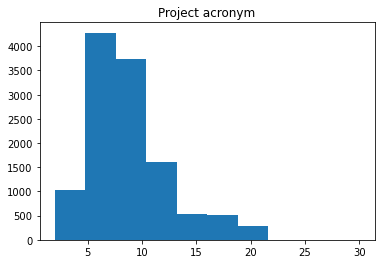

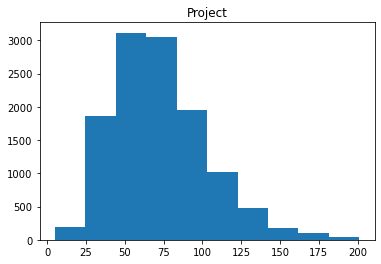

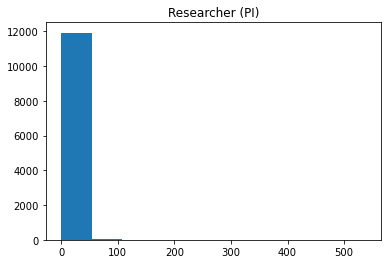

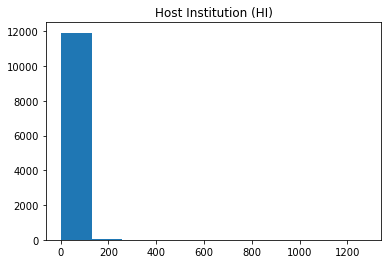

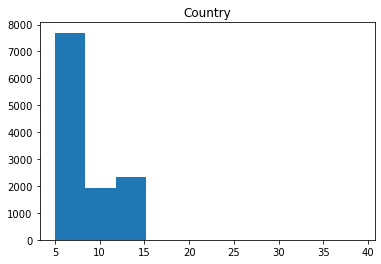

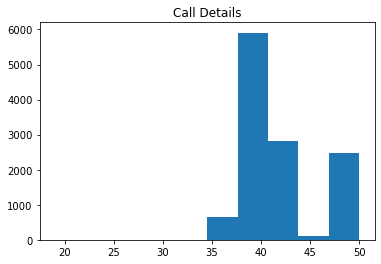

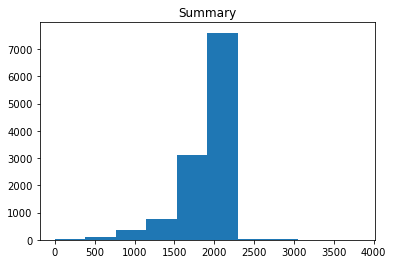

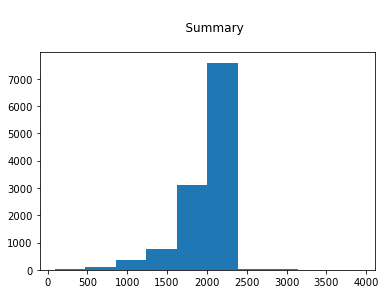

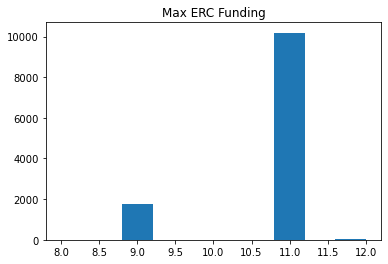

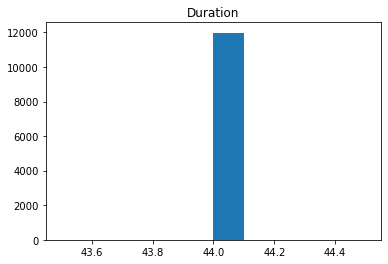

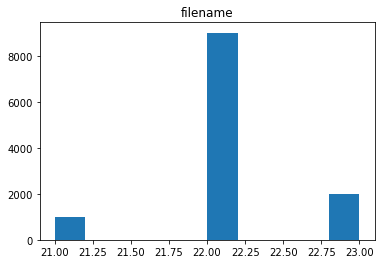

In [163]:
import matplotlib.pyplot as plt

## Count Nan values
df.apply(lambda x: x.isna().sum())

## Plot length of the String
for col in df.columns:
    plt.figure()
    plt.hist(df[col].fillna('').apply(len))
    plt.title(col)


In [1]:
# [Answer to Ex. 7.3.5 here]

In [164]:
# We might want to group/aggregate the insitution into departments, faculties, universities to count them right
# We might want to generate new features such as city or country from this variable
df['Host Institution (HI)'].value_counts().head(15)


CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS                     616
THE CHANCELLOR, MASTERS AND SCHOLARS OF THE UNIVERSITY OF OXFORD      301
THE CHANCELLOR MASTERS AND SCHOLARS OF THE UNIVERSITY OF CAMBRIDGE    287
MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSENSCHAFTEN EV           275
EIDGENOESSISCHE TECHNISCHE HOCHSCHULE ZUERICH                         223
WEIZMANN INSTITUTE OF SCIENCE                                         219
ECOLE POLYTECHNIQUE FEDERALE DE LAUSANNE                              193
THE HEBREW UNIVERSITY OF JERUSALEM                                    158
IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MEDICINE                   144
THE UNIVERSITY OF EDINBURGH                                           134
INSTITUT NATIONAL DE LA SANTE ET DE LA RECHERCHE MEDICALE             131
LUDWIG-MAXIMILIANS-UNIVERSITAET MUENCHEN                              122
TEL AVIV UNIVERSITY                                                   122
UNIVERSITY COLLEGE LONDON             

In [165]:
# Researchers might have the same name
df['Researcher (PI)'].value_counts().head()


Christine Johanna Maria SELHUBER-UNKEL    4
Susana Marcos Celestino                   4
Jacob KLEIN                               4
Martin O'HALLORAN                         4
Klaus Pantel                              4
Name: Researcher (PI), dtype: int64

In [166]:
# Resaerchers tend to use clihe words as acronyms for their proejcts
# We might need to investigate wheter some of them randomly use the same acronym for their project.
df['Project acronym'].value_counts().head()

INTERACT    9
SMART       6
IMAGINE     6
IMPACT      6
ADAPT       5
Name: Project acronym, dtype: int64

In [1]:
# [Answer to Ex. 7.3.6 here]

In [213]:
# Load the LOG
import pandas as pd
log_df = pd.read_csv('erc_log.csv',sep=';') # load the ;-separated log 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [214]:
import datetime
# Convert the time column 't' to datetime 
#log_df['dt'] = log_df.t.apply(datetime.datetime.fromtimestamp)
log_df['dt'] = pd.to_datetime(log_df.t,unit='s')

In [215]:
dt = log_df.dt.values[0]

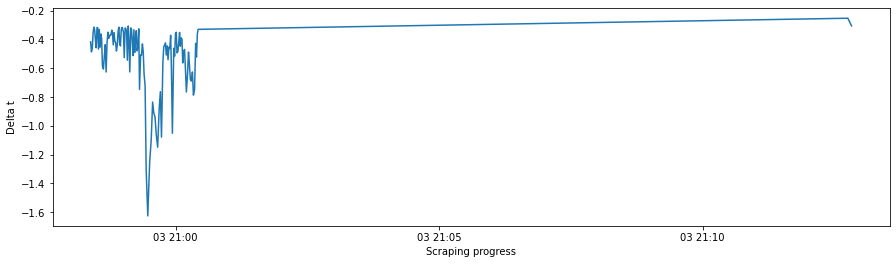

In [216]:
# Plot the time it took to make the call
plt.figure(figsize=(15,4))
plt.plot(log_df.dt,log_df.delta_t)
plt.ylabel('Delta t')
plt.xlabel('Scraping progress')
import datetime

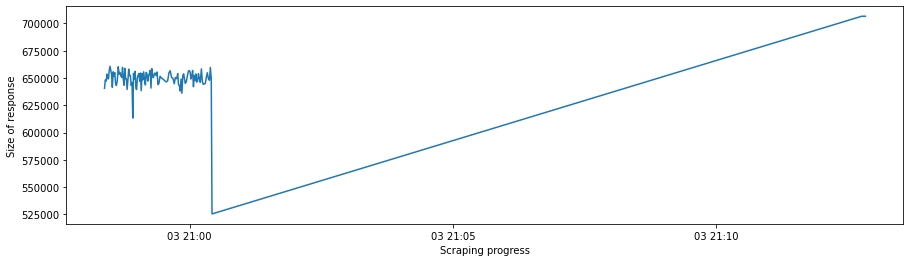

In [217]:
# Plot the response size over time.
plt.figure(figsize=(15,4))
plt.ylabel('Size of response')
plt.xlabel('Scraping progress')
plt.plot(log_df.dt,log_df.response_size)

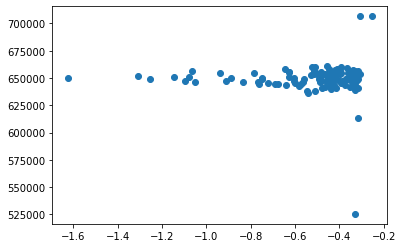

In [218]:
# Plot the delta_t against the response_size. These two should correlate pretty well.
plt.scatter(log_df.delta_t,log_df.response_size)

In [219]:
log_df.success.value_counts() ## Count errors
## Groupby time
# round the time for aggregation
log_df['dt_minute'] = log_df.dt.apply(lambda x: x-datetime.timedelta(seconds=x.second,microseconds=x.microsecond))
log_df['dt_hour'] = log_df.dt.apply(lambda x: x-datetime.timedelta(minutes=x.minute,seconds=x.second,microseconds=x.microsecond))
log_df.groupby('dt_hour').success.mean()


dt_hour
2021-08-03 20:00:00.000000000    True
2021-08-03 20:00:00.000000008    True
2021-08-03 20:00:00.000000016    True
2021-08-03 20:00:00.000000024    True
2021-08-03 20:00:00.000000032    True
2021-08-03 20:00:00.000000040    True
2021-08-03 20:00:00.000000048    True
2021-08-03 20:00:00.000000056    True
2021-08-03 20:00:00.000000064    True
2021-08-03 20:00:00.000000080    True
2021-08-03 20:00:00.000000088    True
2021-08-03 20:00:00.000000096    True
2021-08-03 20:00:00.000000104    True
2021-08-03 20:00:00.000000112    True
2021-08-03 20:00:00.000000120    True
2021-08-03 20:00:00.000000128    True
2021-08-03 20:00:00.000000208    True
2021-08-03 20:00:00.000000776    True
2021-08-03 20:00:00.000000792    True
2021-08-03 20:00:00.000000808    True
2021-08-03 20:00:00.000000840    True
2021-08-03 20:00:00.000000872    True
2021-08-03 20:00:00.000000880    True
2021-08-03 20:00:00.000000888    True
2021-08-03 20:00:00.000000896    True
2021-08-03 20:00:00.000000904    True
2021

Congratulations on coming this far. You are now able to create your own dataset by scraping the majority of website on the internet. The last thing you will learn in this course is to deal with the most common challenge for scrapers: javascript. Stay tuned for module_8.